In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from targen.data import target
import seaborn as sns

# Generate some data


In [12]:
n_samples = 10000
data = pd.DataFrame(
    {"col_0":np.random.uniform(size = n_samples),
     "col_1":np.random.uniform(size = n_samples)
    }
)

In [13]:
# expressions_target = {}
# # linear component
# expressions_target['linear'] = {
#     'weight':0.9,
#     'expr':'-0.5*col_0 + 1.*col_1'
# }
# expressions_target['uniform_noise'] = {'weight':1.3}

In [175]:
expressions_target = {}
# linear component
expressions_target['non_linear'] = {
    'weight':0.9,
    'expr':'(col_0-0.5)**2 +(col_1-0.5)**2'
}
expressions_target['uniform_noise'] = {'weight':1.3}


expressions_selection = {}
# linear component
expressions_selection['linear'] = {
    'weight':1,
    'expr':'0.9*(col_0) -0.2*(col_1)-0.2'
}
expressions_selection['uniform_noise'] = {'weight':0}

In [176]:
df_score_target = target.get_target_and_contributions(data, 
                                               expressions= expressions_target, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.2,
                                               drop_features = False
                                              )

df_score_selection = target.get_target_and_contributions(data, 
                                               expressions= expressions_selection, 
                                               q_clip = (0.01,0.99),
                                               rescale_contributions=True,
                                               imbalance = 0.7,
                                               drop_features = False
                                              )



In [177]:
{
    col:f"{col}_target" for col in df_score_target.columns if col.startswith("score")
                               }

{'score_non_linear': 'score_non_linear_target',
 'score_uniform_noise': 'score_uniform_noise_target',
 'score_pred': 'score_pred_target',
 'score_total': 'score_total_target'}

In [178]:
df_score_target = df_score_target.rename(columns={
    col:f"{col}_target" for col in df_score_target.columns if col.startswith("score")
                               }
                      )
df_score_selection = df_score_selection.rename(columns={
    col:f"{col}_sel" for col in df_score_selection.columns if col.startswith("score")
                               }
                      )

df_score_selection = df_score_selection.rename(columns = {"y":"is_selected"})


In [179]:
exp_data = pd.concat([df_score_target, df_score_selection.drop(["col_0","col_1"],axis=1)], axis = 1)

In [180]:
exp_data.head()

,col_0,col_1,score_non_linear_target,score_uniform_noise_target,score_pred_target,score_total_target,y,score_linear_sel,score_uniform_noise_sel,score_pred_sel,score_total_sel,is_selected
0,0.228322,0.144822,0.463419,0.328875,0.463419,1.255712,0,0.325303,1.000000e-08,0.325303,0.650607,1
1,0.453297,0.814068,0.229631,0.727242,0.229631,1.186504,0,0.395566,1.000000e-08,0.395566,0.791133,1
2,0.719749,0.866336,0.422388,0.578465,0.422388,1.423242,0,0.630395,1.000000e-08,0.630395,1.260791,1
3,0.322957,0.108946,0.426382,0.034118,0.426382,0.886882,0,0.419856,1.000000e-08,0.419856,0.839711,1
4,0.818342,0.929892,0.667027,0.603173,0.667027,1.937227,1,0.708233,1.000000e-08,0.708233,1.416465,1


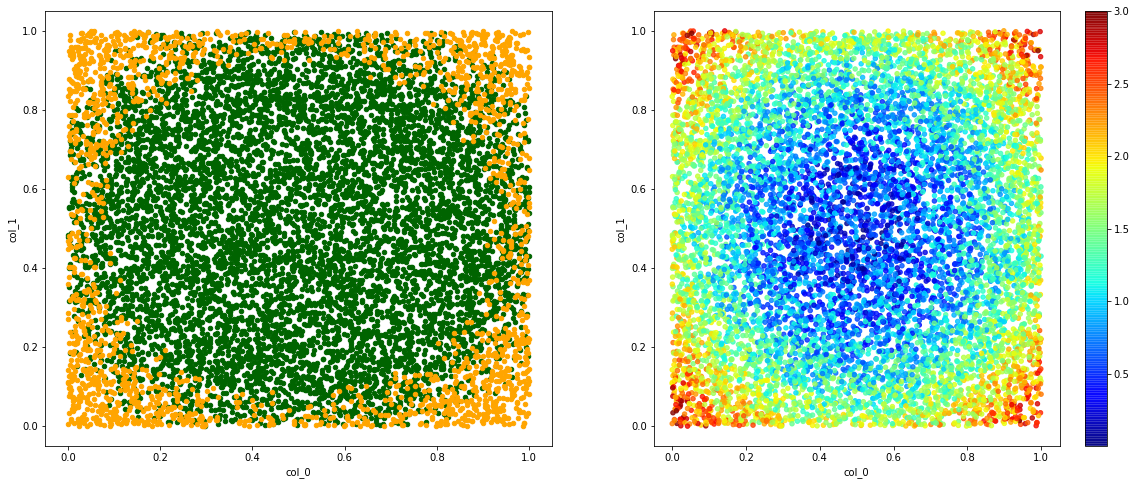

In [181]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
exp_data[exp_data["y"]==0].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "darkgreen");
exp_data[exp_data["y"]==1].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "orange");
exp_data.plot.scatter(x="col_0", y="col_1", c=exp_data["score_total_target"], cmap='jet', alpha = 0.8, ax = ax[1]);



In [182]:
sel_data = exp_data[exp_data['is_selected']==1]

In [183]:
exp_data['y'].value_counts(normalize = True)

0    0.8
1    0.2
Name: y, dtype: float64

In [184]:
exp_data['is_selected'].value_counts(normalize = True)

1    0.7
0    0.3
Name: is_selected, dtype: float64

In [185]:
sel_data['y'].value_counts(normalize = True)

0    0.840286
1    0.159714
Name: y, dtype: float64

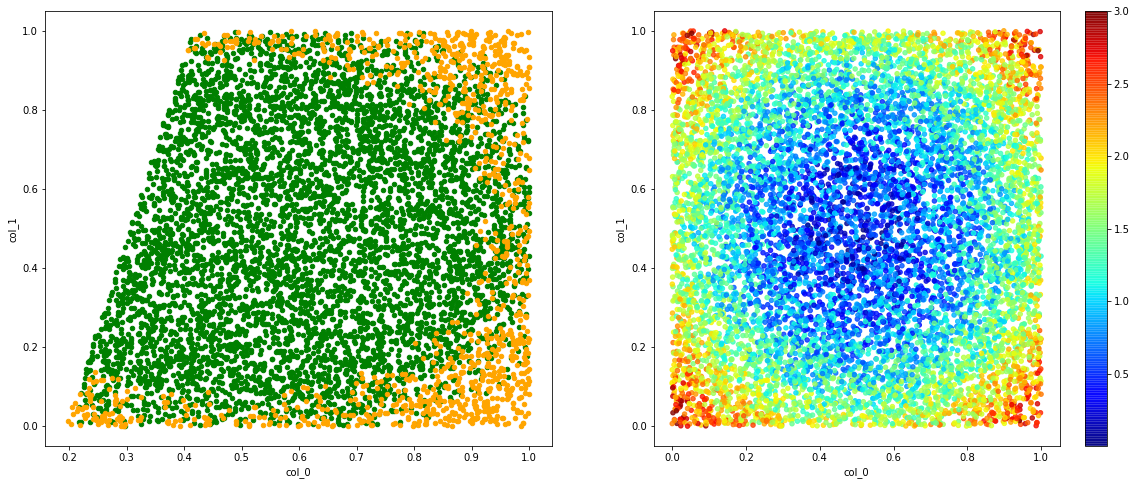

In [186]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
sel_data[sel_data["y"]==0].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "green");
sel_data[sel_data["y"]==1].plot.scatter(x="col_0", y="col_1", ax = ax[0], color = "orange");
exp_data.plot.scatter(x="col_0", y="col_1", c=exp_data["score_total_target"], cmap='jet', alpha = 0.8, ax = ax[1]);



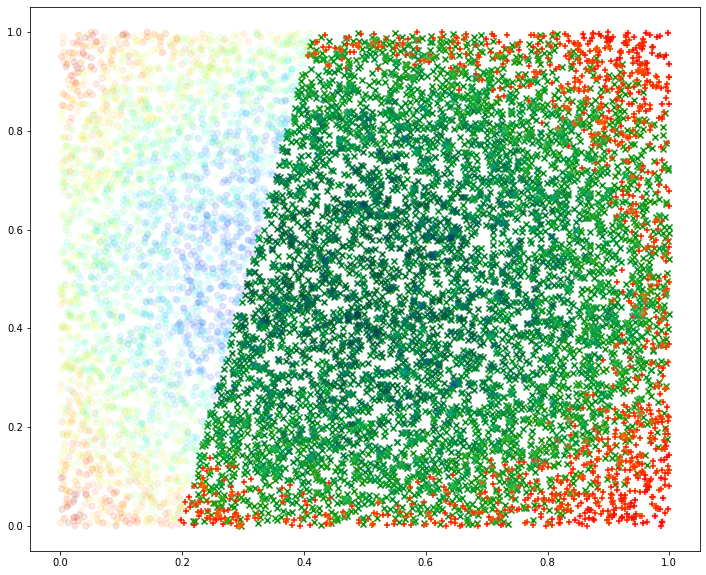

In [187]:
fig, ax = plt.subplots(figsize=(12,10))

x_0 = sel_data[sel_data["y"]==0]['col_0'].values
y_0 = sel_data[sel_data["y"]==0]['col_1'].values
x_1 = sel_data[sel_data["y"]==1]['col_0'].values
y_1 = sel_data[sel_data["y"]==1]['col_1'].values


ax.scatter(x_0,y_0,marker='x', color = 'green', alpha = 1)
ax.scatter(x_1,y_1,marker='+', color = 'red', alpha = 1)

ax.scatter(
    exp_data["col_0"], exp_data["col_1"], c=exp_data["score_total_target"], cmap='jet', alpha = 0.1
)


